<a href="https://colab.research.google.com/github/luksprkz/Desafios-Bootcamp-Geracao-Tech-Unimed-BH---Ciencia-de-Dados-na-DIO-Python/blob/main/pandas_excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Salvador.xlsx')

In [ ]:
#concatenando(juntando) todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])
#mostrando os tipos de dados das colunas
df

In [ ]:
#amosta dentro da tabela
df.sample(20)
#substituindo os valores nulos por 0
df['Vendas'].fillna(0, inplace=True)

In [ ]:
#substituindo os valores nulos pela média de uma coluna
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [ ]:
#verifica quantas linhas tem valores nulos em cada coluna
df.isnull().sum()

In [ ]:
#alterar o tipo de algum dado dentro da coluna
df['LojaID'] = df['LojaID'].astype('object')

In [ ]:
#substituindo os valores nulos pela média(mean)
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)
#definindo a coluna vendas como do tipo inteiro
df['Vendas'] = df['Vendas'].astype('int')
df['Qtde'] = df['Qtde'].astype('int')
df.head(10)

In [ ]:
#remover todas linhas com valores nulos
df.dropna(inplace=True)
#remover as linhas com valores nulos em uma coluna específica
df.dropna(subset=['Vendas'],inplace=True)
#remover linas cujos valores em todas as colunas sejam nulos
df.dropna(how='all', inplace=True)

In [ ]:
#criando uma coluna('Receita') - (* ou . mul)
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [ ]:
df['Receita'] = df['Receita'].astype('float')

In [ ]:
#maior valor na coluna
df['Receita'].max()

In [ ]:
#menor valor na coluna
df['Receita'].min()

In [ ]:
#maiores valores dentro da coluna (parâmetro, coluna)
df.nlargest(3,'Receita')

In [ ]:
#menores valores dentro da coluna (parâmetro, coluna)
df.nsmallest(10,'Receita')

In [ ]:
#agrupar e mostrar quem tem a maior receita total
df.groupby('Cidade')['Receita'].sum()

In [ ]:
#agrupar e mostrar quem tem a maior receita média
df.groupby('Data')['Receita'].mean()

In [ ]:
#ordenando o conjunto de dados
df.sort_values('Receita', ascending=True).head(20)

In [ ]:
#agrupando as colunas 'Data' à coluna 'Receita' e ordenando pela 'Receita'
df = df.groupby(by=['Data', 'Receita']).sum().sort_values(by='Receita', ascending=False)
df.head(10)

# TRABALHANDO COM DATAS

In [ ]:
#transformando 'Data' em int e depois em date time
df['Data'] = df['Data'].astype('int')
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

In [ ]:
#agrupamento por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

In [ ]:
#criando uma coluna para o ano
df['Ano_Vendas'] = df['Data'].dt.year

In [ ]:
df['Mes_Vendas'], df['Dia_Vendas'] = (df['Data'].dt.month, df['Data'].dt.day)

In [ ]:
#mostrando a menor(primeira) data
df['Data'].max()

In [ ]:
#calculando a diferença de dias
df['Diferença_de_Dias'] = df['Data'] - df['Data'].min()

In [ ]:
#criando a coluna de trimestre
df['Trimestre_de_Vendas'] = df['Data'].dt.quarter
df.sample(5)

In [ ]:
#filtrando as vendas de 2019 de um mês específico
vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]
vendas_marco_2019

In [ ]:
vendas_2019 = df.loc[(df['Data'].dt.year == 2019)]
vendas_2019

In [ ]:
vendas_2018 = df.loc[(df['Data'].dt.year == 2018)]
vendas_2018

In [ ]:
Natal_2018 = df.loc[(df['Data'].dt.year == 2018) & (df['Cidade'] == 'Natal')]
Natal_2018

In [ ]:
Natal_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Cidade'] == 'Natal')]
Natal_2019

# **VISUALIZAÇÃO DE DADOS**

In [ ]:
#contando os valores de linhas representadas na coluna
df['LojaID'].value_counts(ascending=False)

In [ ]:
#grafico de barras (matplotlib.pyplot)
df['LojaID'].value_counts(ascending=False).plot.bar();

In [ ]:
#grafico de barras horizontais (matplotlib.pyplot)
df['LojaID'].value_counts(ascending=True).plot.barh();

In [ ]:
#grafico de pizza da receita por mês em 2018 (matplotlib.pyplot)
vendas_2018.groupby(vendas_2018['Data'].dt.month)['Receita'].sum().plot.pie();

In [ ]:
#grafico de pizza da receita por mês em 2019 (matplotlib.pyplot)
vendas_2019.groupby(vendas_2019['Data'].dt.month)['Receita'].sum().plot.pie();

In [ ]:
#grafico de pizza da receita por mês em todo o periodo (matplotlib.pyplot)
df.groupby(df['Data'].dt.month)['Receita'].sum().plot.pie();

In [ ]:
#contagem de quantas vendas fora realizadas por cidade 
df['Cidade'].value_counts(ascending=True)

In [ ]:
#grafico de receita total por cidade
df.groupby(df['Cidade'])['Receita'].sum().plot.barh();

In [ ]:
#grafico de receita em Natal no ano de 2018, separado por mês
Natal_2018.groupby(Natal_2018['Data'].dt.month)['Receita'].sum().plot.pie();

In [ ]:
#grafico de receita em Natal no ano de 2019, separado por mês
Natal_2019.groupby(Natal_2019['Data'].dt.month)['Receita'].sum().plot.pie();

In [ ]:
#adicionando um título e alterando os nomes dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts(ascending=True).plot.barh(title='Total de vendas por cidade', color='purple')
plt.xlabel('Cidade')
plt.ylabel('Total de vendas')

In [ ]:
#alterando o estilo do gráfico
plt.style.use('ggplot')

In [ ]:
df_2019 = df[df['Ano_Vendas'] == 2019]
df_2019.groupby(df_2019['Mes_Vendas'])['Qtde'].sum().plot(title='Total de vendas por mês(2019)', color='purple', marker='o')
plt.xlabel('Mês')
plt.ylabel('Produtos vendidos')
plt.legend();

In [ ]:
plt.hist(df['Qtde'], color='midnightblue');

In [ ]:
plt.scatter(x=df_2019['Dia_Vendas'], y=df_2019['Receita'], color='midnightblue');
plt.xlabel('Dia da venda')
plt.ylabel('Receita auferida');

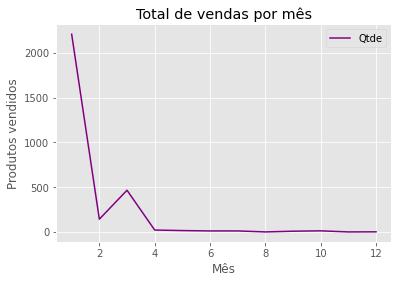

In [ ]:
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot(title='Total de vendas por mês', color='purple')
plt.xlabel('Mês')
plt.ylabel('Produtos vendidos')
plt.legend()
#salvar o gráfico em arquivo.png
plt.savefig("grafico Qtde x Mês de venda.png");